In [1]:
pip install pytrends s
eaborn matplotlib pandas plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pytrends.request import TrendReq

#setup pytrends library and keyword define

In [5]:
pytrends=TrendReq(hl='en-US',tz=360)
keyword="cloud computing"


#Data Request

In [6]:
pytrends.build_payload([keyword],cat=0,timeframe='today 12-m',geo='',gprop='')

#Countrywise Interest

In [11]:
region_data=pytrends.interest_by_region()
region_data=region_data.sort_values(by=keyword,ascending=False).head(15)

C:\Users\dell\AppData\Local\Temp\ipykernel_34632\983860092.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_data[keyword],y=region_data.index,palette="Blues_d")


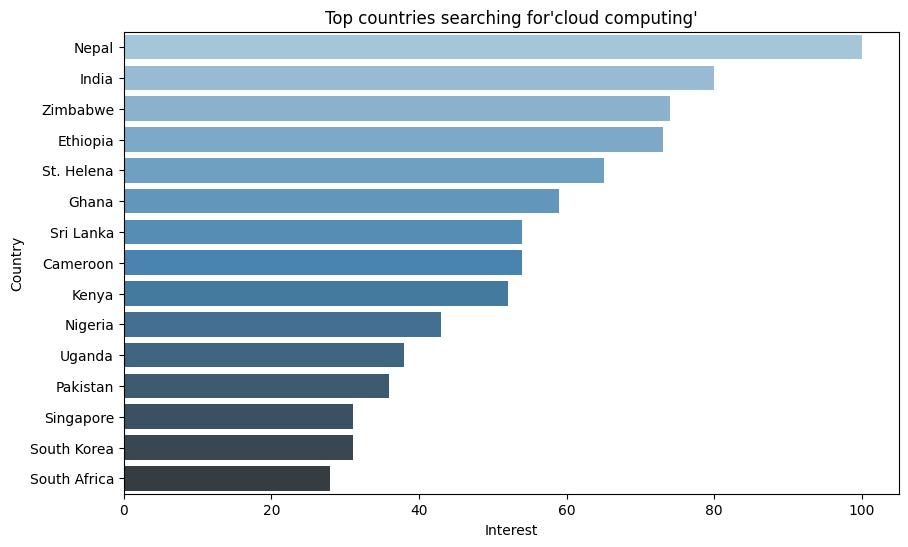

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(x=region_data[keyword],y=region_data.index,palette="Blues_d")
plt.title(f"Top countries searching for'{keyword}'")
plt.xlabel("Interest")
plt.ylabel("Country")
plt.show()
        


#World map

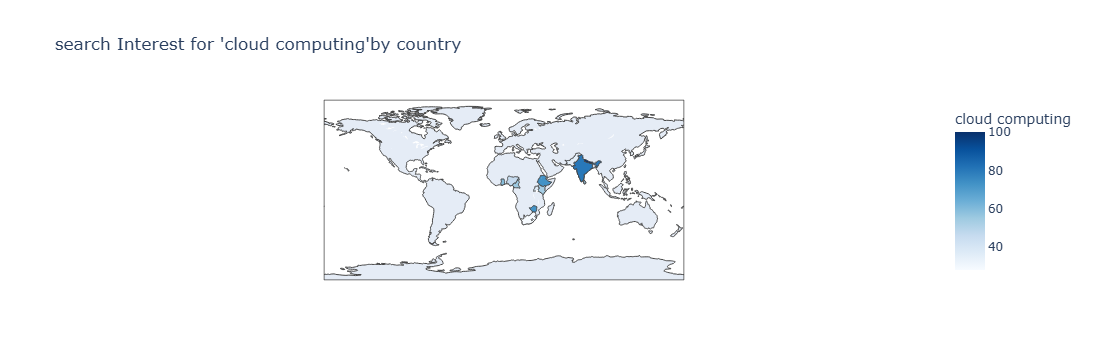

In [26]:
region_data=region_data.reset_index()
fig=px.choropleth(region_data,locations='geoName',locationmode='country names',color=keyword,title=f"search Interest for '{keyword}'by country",color_continuous_scale='Blues')
fig.show()

#Time wise Interest

In [15]:
time_df=pytrends.interest_over_time()


C:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



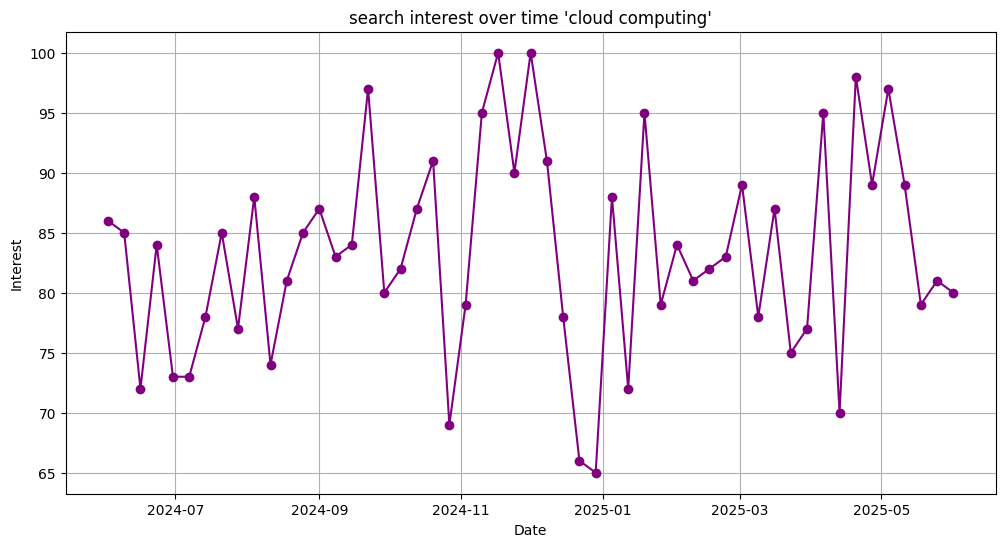

In [23]:
plt.figure(figsize=(12,6))
plt.plot(time_df.index,time_df[keyword],marker='o',color='purple')
plt.title(f"search interest over time '{keyword}'")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.grid(True)
plt.show()

#Multiple keyword compare

In [18]:
kw_list=["cloud computing","data science","machine learning"]
pytrends.build_payload(kw_list,cat=0,timeframe='today 12-m',geo='',gprop='')


C:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



NameError: name 'plt_tight_layout' is not defined

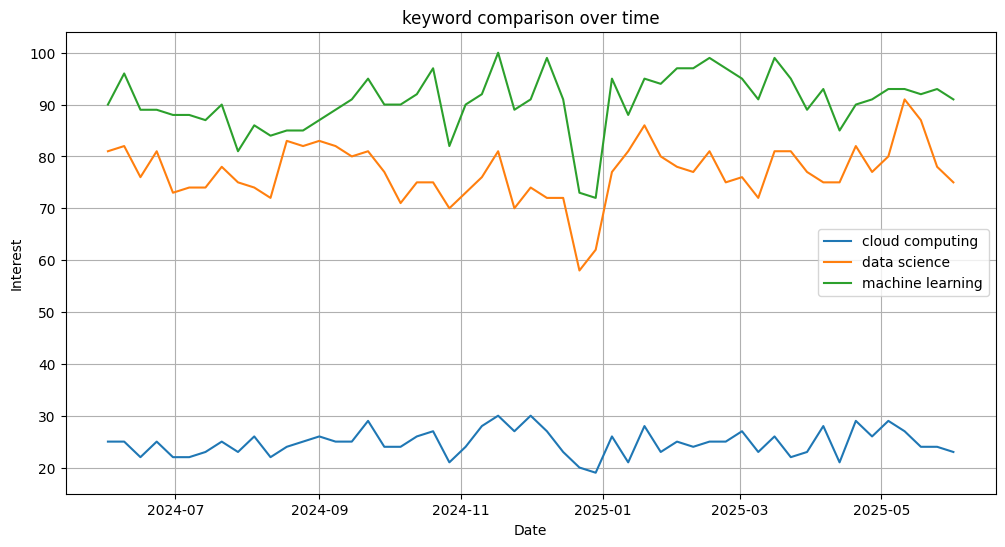

In [19]:
compare_df=pytrends.interest_over_time()
plt.figure(figsize=(12,6))
for kw in kw_list:
    plt.plot(compare_df.index,compare_df[kw],label=kw)

plt.title("keyword comparison over time")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.legend()
plt.grid(True)
plt_tight_layout()
plt.show()
